# 1er TP de sistemas inteligentes

Nombre:

Este trabajo práctico se aprueba completando más del 70% del mismo. Una vez completado el notebook y reenvielo al email 2329034@ucc.edu.ar. Importante: Asegurese que su correo haya llegado.

### Entender el problema

Este conjunto de datos describe los hongos en términos de sus características físicas. Se clasifican como venenosos o comestibles.

Este conjunto de datos incluye descripciones de muestras hipotéticas correspondientes a 23 especies de hongos de láminas en las familias Agaricus y Lepiota. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se combinó con la venenosa. La guía establece claramente que no hay una regla simple para determinar la comestibilidad de un hongo. Con esa informacion:

Siendo la clase positiva la indicación que el hongo es venenoso ¿Qué le estaría pidiendo a mi clasificador qué tenga en cuenta si le pido un puntaje de recall alto

<10%>
Respuesta:

In [1]:
# Significa que estás pidiendo que tenga en cuenta la capacidad de identificar
# correctamente la clase positiva (hongos venenosos) en relación con el total de 
# muestras de esa clase en tus datos de prueba. Es decir, le estamos pidiendo al 
# clasificador que sea muy sensible a la clase positiva, que pueda detectar la mayor 
# cantidad de hongos venenosos posibles, incluso si esto significa identificar 
# algunos hongos como venenosos cuando en realidad no lo son.

# Esto puede ser importante en aplicaciones donde la detección de hongos venenosos es 
# crítica, ya que un falso negativo podría tener consecuencias graves para la salud. 

### Obtención de datos
Importe las librerías a utilizar:

In [2]:
import pandas as pd

Importe los datos:

In [3]:
import re

url = "https://gitlab.com/francisco.arduh/datasets/-/raw/main/mushroom.csv"
df = pd.read_csv(url)


# A traves de este codigo convierto las variables del DF en valores simples.
# Los valores se veian asi: b'x' y ahora se ven asi: x
for col in df.columns:
    df[col] = df[col].str.replace("^b'b'$", "b", regex=True)

df = df.applymap(lambda x: str(x).replace("b'", "'").replace('b"', '"'))
df[col] = df[col].apply(lambda x: re.sub(r'^\'(.+)\'$', r'\1', str(x)) if len(str(x)) >= 2 else x)
df = df.applymap(lambda x: x.replace("'", "") if len(str(x)) > 1 else x)


display(df)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [4]:
# Viendo los datos nosotros tenemos que enfocarnos en la columna 'class' 
# donde hongo comestible = b'e' y hongo venenoso = b'p'

<10%> Realice una exploración de los datos, compruebe si existe faltante de datos en alguna columna, que tipo de distribución tienen los datos, si alguna columna tiene muchos datos únicos.

In [5]:
# Nos fijamos que no haya datos nulos

print(df.isnull().sum())

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64


In [6]:
# Corroboramos si hay columnas con muchos datos únicos
unique_counts = df.nunique()

print(unique_counts)

# Vemos que la columna "veil-type" podría eliminarse ya que solo tiene un valor único y no proporciona ninguna información útil para el modelo.

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises%3F                   2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
class                        2
dtype: int64


In [7]:
# Vemos informacion del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [8]:
# Utilizamos describe para ver otras estadisticas del dataframe

df.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Hago histograma para cada columna, ESTA COMENTADO SOLO PORQUE QUEDA MUY EXTENSO

# Crear un histograma para cada característica
#for feature in df.columns:
#    fig, ax = plt.subplots(figsize=(3, 3))
#    ax.hist(df[feature])
#    ax.set_title(feature)
#    plt.show()

In [10]:
# Vemos los valores de nuestra variable objetivo Class
df["class"].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

<Axes: title={'center': 'Comestible vs. Venenoso'}, xlabel='class'>

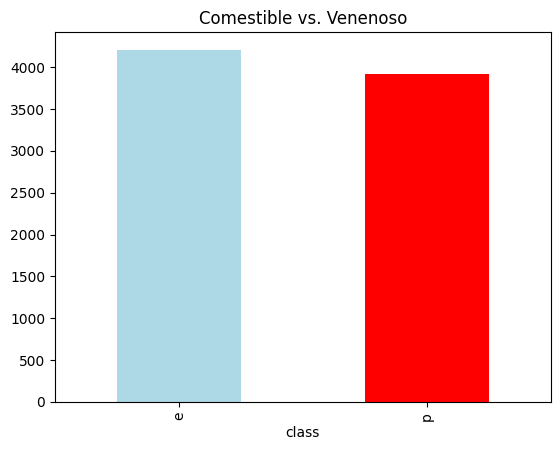

In [11]:
# Lo graficamos para verlo mejor

df["class"].value_counts().plot(kind="bar",color=["lightblue", "red"], title="Comestible vs. Venenoso")

In [12]:
# Definimos las variables de la columna "Class" como numericas

# Creamos un diccionario que mapea los valores a reemplazar con sus correspondientes valores nuevos
reemplazos = {"e": 0, "p": 1}

# Utilizamos la función replace() para reemplazar los valores en la columna
df['class'] = df['class'].replace(reemplazos)

# Ahora tenemos: hongo venenoso = 1, y hongo comestible = 0
display(df)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,1
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,0
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,0
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,1
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,0
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,0
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,0
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,1


In [13]:
# Definimos X e y

X = df.drop(['class', 'veil-type'], axis=1)
y = df['class']

In [14]:
# Usamos LabelEncoder para convertir los datos categoricos en numericos
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()

for col in X.columns:
    X[col] = encoder.fit_transform(X[col])

In [15]:
# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<5%> Separar X_train, y_train, X_test, y_test

In [16]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test)


      cap-shape  cap-surface  cap-color  bruises%3F  odor  gill-attachment   
7873          3            2          2           0     7                1  \
6515          5            2          4           0     2                1   
6141          2            3          2           0     8                1   
2764          2            0          4           1     5                1   
438           0            3          9           1     3                1   
...         ...          ...        ...         ...   ...              ...   
5226          5            3          4           0     2                1   
5390          3            3          2           1     5                1   
860           2            3          4           1     3                1   
7603          3            2          2           0     2                1   
7270          3            0          3           0     5                1   

      gill-spacing  gill-size  gill-color  stalk-shape  ...   


### Procesado y transformación de datos
<10%> ¿Qué transformaciones debería aplicar? Especifique y justifique por grupo de columnas.

Por ejemplo: columna A, B y C aplicaría transformación X porque ...

Escriba los nombres de las columna en una lista por cada grupo:

In [17]:
# Primero hacemos una copia como buena practica

X_train = X_train.copy()
X_test = X_test.copy()

In [18]:
#Las transformaciones las hice mas arriba donde hice las siguientes modificaciones:

# 1. Variables categóricas con más de un valor único: lo que hice con estas columnas
# fue utilizar LabelEncoder para transformar cada valor único en una nueva columna binaria.
# En un principio utilize OneHotEncoder pero me parecio mas dinamico y simple usar LabelEncoder para estos casos.

# 2. Variables de identificación: La columna "veil-type" solo tenia un valor único y 
# no proporcionaba información útil para el modelado, por lo que la elimine.

# 3. Variable objetivo: En la columna 'class' lo que hice fue reemplazar los valores de sus 
# variables por 0 y 1 transformandola en binaria.

<15%> A continuación escriba el código para realizar las transformaciones transformaciones

In [19]:
# OBSERVACION: Ya hecho arriba !

### Selección de modelo y entrenamiento
 


In [20]:
# Primero lo probe con el modelo SGD solo para ver como estaba funcionando
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [21]:
# Prediccion

y_pred = sgd_clf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9483076923076923


In [23]:
# Pareciera funcionar correctamente, por lo tanto, pasamos a aplicar otros modelos.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
cla_log = LogisticRegression(max_iter=10000)    # esto es para evitar los warnings
cla_rf = RandomForestClassifier(random_state=42)

In [25]:
#Entrenamos el modelo Random Forest

from sklearn.model_selection import cross_val_score

model_train = cla_rf.fit(X_train, y_train)
y_pred_rf = cla_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Valor en la region de prueba con Random Forest: ", accuracy_rf)

# Determino el valor en la region de entrenamiento 
pred_train = model_train.score(X_train,y_train)
print("Valor en la region de entrenamiento con Random Forest: ",pred_train)

#Validacion cruzada
crossAccuracy=cross_val_score(cla_rf,X_train,y_train,cv=3)
print("Validacion cruzada: ",crossAccuracy)


Valor en la region de prueba con Random Forest:  1.0
Valor en la region de entrenamiento con Random Forest:  1.0
Validacion cruzada:  [1. 1. 1.]


In [26]:
#Entrenamos el modelo Logistic Regression

model_train_log = cla_log.fit(X_train, y_train)
y_pred_log = cla_log.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print("Valor en la region de prueba con Logistic Regression: ", accuracy_log)

# Determino el valor en la region de entrenamiento 
pred_train_log = model_train_log.score(X_train,y_train)
print("Valor en la region de entrenamiento con Logistic Regression: ",pred_train_log)

#Validacion cruzada
crossAccuracy_log = cross_val_score(cla_log,X_train,y_train,cv=3)
print("Validacion cruzada: ",crossAccuracy_log)


Valor en la region de prueba con Logistic Regression:  0.9476923076923077
Valor en la region de entrenamiento con Logistic Regression:  0.9515310047699647
Validacion cruzada:  [0.95985233 0.94690674 0.94459834]


<15%>Utilice validación cruzada para evaluar los modelos que se importaron. Utilice el de area bajo la curva roc mas alto.
Utilizar el metodo "cross_val_predict", tenga en cuenta que la variable, "method" para el LogisticRegression es "decision_function" y para RandomForestClassifier es "predict_proba" (ver clase o libro)

<10%>¿Por qué lo eligiria el modelo por el area bajo la curva roc?

In [27]:
# Curva de ROC: La curva ROC es una herramienta que se utiliza para evaluar la capacidad de un modelo de clasificación para distinguir entre dos clases. En la curva ROC, se representa la tasa de verdaderos positivos (TPR) en el eje y y la tasa de falsos positivos (FPR) en el eje x para diferentes umbrales de decisión.
# En base a los resultados que nos pueden dar, un modelo perfecto tendría una tasa de verdaderos positivos del 100% y una tasa de falsos positivos del 0%.

# Cuanto mayor sea el área bajo la curva ROC, mejor será el rendimiento del modelo en la clasificación.
# Por lo tanto vamos a comparar los dos modelos y elegir el que tenga un AUC mayor.

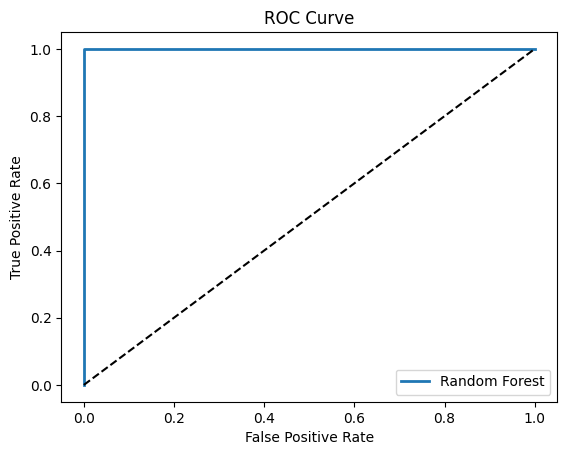

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

y_probas_rf = cross_val_predict(cla_rf, X_train, y_train, cv=5, method="predict_proba")
y_scores_rf = y_probas_rf[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_scores_rf)

def plot_roc_curve(fpr_rf, tpr_rf, label=None):
    plt.plot(fpr_rf, tpr_rf, linewidth=2, label='Random Forest')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

#Veo grafico
plot_roc_curve(fpr_rf, tpr_rf)


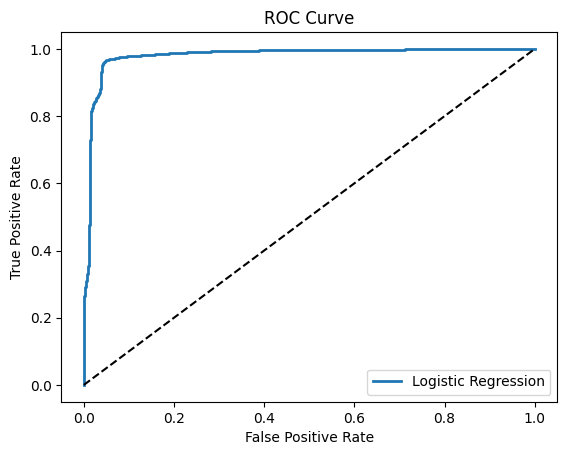

In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

y_scores_log = cross_val_predict(cla_log, X_train, y_train, cv=5, method = "decision_function")

fpr_log, tpr_log, thresholds_log = roc_curve(y_train, y_scores_log)

def plot_roc_curve(fpr_log, tpr_log, label=None):
    plt.plot(fpr_log, tpr_log, linewidth=2, label='Logistic Regression')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

#Veo grafico
plot_roc_curve(fpr_log, tpr_log)



In [30]:
# Vemos los resultados con la metrica auc

from sklearn.metrics import roc_auc_score

auc_rf = roc_auc_score(y_train, y_scores_rf)
print("AUC para Random Forest:", auc_rf)

auc_log = roc_auc_score(y_train, y_scores_log)
print("AUC para Regresión Logística:", auc_log)

AUC para Random Forest: 1.0
AUC para Regresión Logística: 0.9808466030906768


In [31]:
# Elijo RandomForest, ya que tiene un AUC mas alto y tendra un mayor rendimiento.

<15>Utilice el metodo grid search sobre el modelo elegido  
en caso de ser LogisticRegression
```
param_grid = [
{'C': [0.1, 1, 10], 'penalty': ['elasticnet'], 'l1_ratio': [0.,0.2,0.4]}
]
```
en caso de ser RandomForest utilize:
```
param_grid = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]
```
¿Cuál es el sentido de hacer esto?

In [32]:
# El método de Grid Search es una técnica de optimización de hiperparámetros que ayuda a encontrar 
# los valores óptimos para los parámetros de un modelo de aprendizaje automático. 

# El sentido de utilizar Grid Search sobre el modelo Random Forest es que este modelo tiene varios 
# hiperparámetros que pueden ser ajustados para mejorar su rendimiento. El objetivo es buscar el 
# conjunto óptimo de valores de hiperparámetros que maximizan el rendimiento del modelo en el conjunto de datos.

# Se puede mejorar su capacidad para generalizar y predecir valores precisos para nuevos datos. 

In [33]:

from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]

# Defino la funcion grid search
GridSearch=GridSearchCV(cla_rf,param_grid,cv=3,scoring='accuracy')

# Entreno el modelo 
GridSearch.fit(X_train,y_train)

# Busco los mejores hiperparametros 
best_params = GridSearch.best_params_

#Defino el mejor modelo
best_model=RandomForestClassifier(**best_params,random_state=42)

#Re entreno el modelo
best_model.fit(X_train,y_train)
accuracy = cross_val_score(best_model,X_train,y_train,cv=3,scoring='accuracy')
print("RandomForest con hiperparametros: ",accuracy)

RandomForest con hiperparametros:  [1. 1. 1.]


In [34]:
# Mejores hiperparametros

print(best_params)

{'max_features': 2, 'n_estimators': 30}


<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de validación

In [35]:
# Definimos la region de validacion

validacion_rf = (y_scores_rf > 0.5)


In [36]:
# 1. Accuracy
accuracy = accuracy_score(y_train, validacion_rf)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [37]:
# 2. Recall
from sklearn.metrics import recall_score
recall = recall_score(y_train, validacion_rf)
print('Recall: ', recall)

Recall:  1.0


In [38]:
# 3. Precision

from sklearn.metrics import precision_score
p = precision_score(y_train, validacion_rf)
print("Precision: ",p)

Precision:  1.0


In [39]:
# 4. F1 Score

from sklearn.metrics import f1_score
f1 = f1_score(y_train, validacion_rf)
print('F1: ',f1)

F1:  1.0


In [40]:
# 5 ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_train, validacion_rf)
print('ROC auc: ',roc_auc)

ROC auc:  1.0


<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de test, 
¿Los números son parecido a lo obtenido en las regiones de validación? ¿A qué puede deberse?

In [41]:
# Ahora trabajamos en las regiones de test
# Hacemos las predicciones 

y_test_pred_rf = cross_val_predict(cla_rf, X_test, y_test, cv=3)

In [42]:
accuracy = accuracy_score(y_test, y_test_pred_rf)
print('Accuracy:', accuracy)

Accuracy: 0.9987692307692307


In [43]:
# 2.Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_test_pred_rf)
print('Recall: ', recall)

Recall:  0.9974424552429667


In [44]:
# 3.Precision
from sklearn.metrics import precision_score
p = precision_score(y_test, y_test_pred_rf)
print('Precision: ', p)

Precision:  1.0


In [45]:
# 4.F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_test_pred_rf)
print('F1: ',f1)

F1:  0.998719590268886


In [46]:
# 5.ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_test_pred_rf)
print('ROC auc: ',roc_auc)


ROC auc:  0.9987212276214834


In [47]:
# Los datos obtenidos entre ambas regiones son muy similares, y esto nos podría 
# indicar que el modelo está generalizando bien y que no está sobreajustando a los
# datos de entrenamiento. 